# Exploratory Data Analysis

In [298]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Ignores any warning
warnings.filterwarnings("ignore")

In [299]:
#Reading csv file
train = pd.read_csv("C:/Users/HP/Desktop/Assignment/test/train.csv")
test = pd.read_csv("C:/Users/HP/Desktop/Assignment/test/test.csv")

In [300]:
#View the data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [301]:
#Basic information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [302]:
#Describe the data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [303]:
#Total number of rows and columns in the test data
test.shape

(5681, 11)

In [304]:
#Total number of rows and columns in the train data
train.shape

(8523, 12)

# Data Preprocessing

In [305]:
#Checking missing values..............
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [306]:
#filling missing values
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [307]:
#filling missing values
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [308]:
#Checking missing values..............
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [309]:
#filling missing values
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [310]:
#filling missing values
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [311]:
#counts of unique values
train.Item_Fat_Content.value_counts() 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [312]:
#counts of unique values
train.Item_Weight.value_counts() 

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

In [313]:
train =  train.replace(to_replace ="low fat",  value ="Low Fat") 
train =  train.replace(to_replace ="LF",  value ="Low Fat") 
train =  train.replace(to_replace ="reg",  value ="Regular")

<AxesSubplot:>

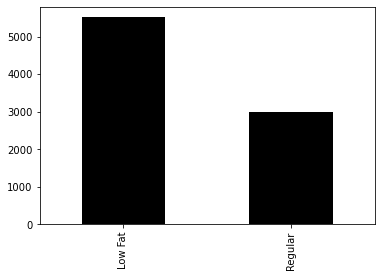

In [314]:
#Visualizing the "Item_Fat_Content"
train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'black')

<AxesSubplot:>

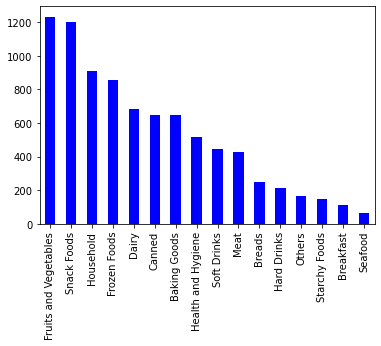

In [315]:
#Visualizing the "Item_Type"
train['Item_Type'].value_counts().plot(kind='bar',color = 'blue')

<AxesSubplot:>

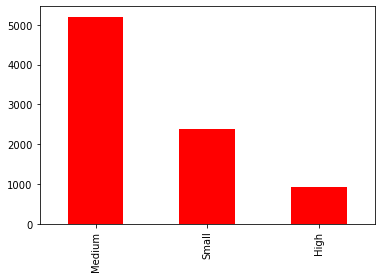

In [316]:
#Visualizing the "Outlet_Size"
train['Outlet_Size'].value_counts().plot(kind='bar',color = 'red')

<AxesSubplot:>

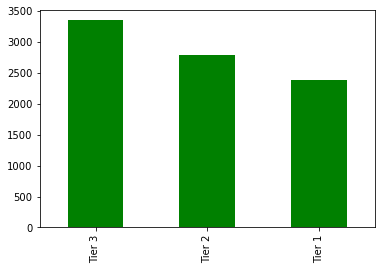

In [317]:
#Visualizing the "Outlet_Location_Type"
train['Outlet_Location_Type'].value_counts().plot(kind='bar',color = 'Green')

<AxesSubplot:>

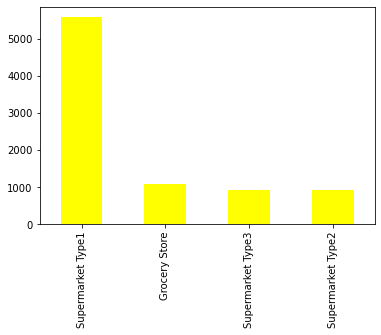

In [318]:
#Visualizing the "Outlet_Type"
train['Outlet_Type'].value_counts().plot(kind='bar',color = 'yellow')

In [319]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train.columns:
    train[col] = labelencoder.fit_transform(train[col])

In [320]:
#one hot encoding
train=pd.get_dummies(train, columns=['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'],drop_first=False)

print(train.shape)

(8523, 35)


In [321]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [322]:
#Separating features and label
X = train.iloc[:,0:37].values
y = train.iloc[:,-1].values

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [324]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[5.97652228e-01 3.28720703e-01 5.17944950e-02 2.08805921e-02
 9.50127649e-04 8.30517815e-07 7.69955268e-07 5.19837220e-08
 4.79642110e-08 2.70988720e-08 1.91927914e-08 1.47374624e-08
 1.39840099e-08 1.25813781e-08 9.70019645e-09 8.79230822e-09
 8.11787812e-09 7.91162571e-09 6.14156280e-09 5.03326392e-09
 3.78512377e-09 3.30692976e-09 3.06354352e-09 2.47304595e-09
 2.05455414e-09 1.60334306e-09 1.49658144e-09 1.36029574e-09
 8.66132085e-10 4.03850625e-10 5.71161441e-33 5.71161441e-33
 5.71161441e-33 5.71161441e-33 5.71161441e-33]


In [325]:
len(explained_variance)

35

In [326]:
print("Sorted List returned :")
print(sorted(explained_variance,reverse = True))

Sorted List returned :
[0.5976522282933953, 0.3287207028375974, 0.051794494975434195, 0.02088059211845243, 0.0009501276493554639, 8.305178148307134e-07, 7.699552684917478e-07, 5.1983722045907023e-08, 4.7964210989904455e-08, 2.7098871963617535e-08, 1.9192791383410765e-08, 1.4737462352560773e-08, 1.3984009948597383e-08, 1.2581378138138643e-08, 9.700196448875066e-09, 8.79230821856185e-09, 8.11787812366088e-09, 7.911625706844112e-09, 6.141562802294371e-09, 5.033263923012875e-09, 3.785123765464122e-09, 3.306929755907964e-09, 3.063543518520634e-09, 2.4730459477398653e-09, 2.0545541404873748e-09, 1.6033430634821648e-09, 1.4965814365088915e-09, 1.3602957370472516e-09, 8.661320845008596e-10, 4.038506254400732e-10, 5.7116144095942755e-33, 5.7116144095942755e-33, 5.7116144095942755e-33, 5.7116144095942755e-33, 5.7116144095942755e-33]


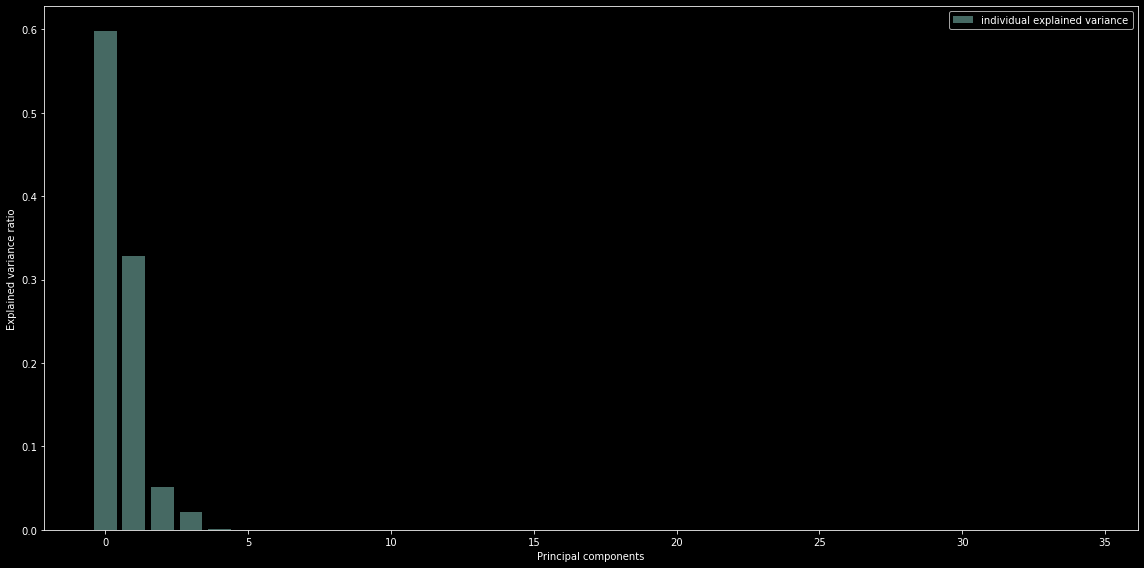

In [327]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 8))
    
    plt.bar(range(35), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    

In [328]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.59765223 0.3287207  0.05179449]


# Modelling

In [329]:
#Model comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [330]:
#Fit Decision_tree
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [331]:
#Fit Decision_tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [332]:
#Fit Random_forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [333]:
#Fit Bagging_Regressor..........
Bagging = BaggingRegressor()
Bagging.fit(X_train, y_train)

BaggingRegressor()

In [334]:
#Fit Extra_tree_regressor........
Extra_trees = ExtraTreesRegressor()
Extra_trees.fit(X_train, y_train)

ExtraTreesRegressor()

In [335]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree),('Bagging',Bagging),('Extra_trees',Extra_trees)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, X_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

print(results[14])

{'fit_time': array([0.39667773, 0.38958716, 0.40830469, 0.38034463, 0.38240886,
       0.38882971, 0.40876222, 0.42269826, 0.43800592, 0.47242546]), 'score_time': array([0.01827455, 0.01515794, 0.01669455, 0.01578212, 0.0176568 ,
       0.02690315, 0.01826167, 0.01713276, 0.01870918, 0.04233146]), 'test_score': array([-0.04205876,  0.07359425,  0.06606906,  0.18201958,  0.15060926,
        0.12002957,  0.10823504,  0.11081244,  0.02393918,  0.12719415]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [336]:
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
BAGGING_RMSE_mean = np.sqrt(-results[9]['test_score'].mean())
BAGGING_RMSE_std= -results[9]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
BAGGING_MAE_mean = results[10]['test_score'].mean()
BAGGING_MAE_std= results[10]['test_score'].std()
BAGGING_r2_mean = results[11]['test_score'].mean()
BAGGING_r2_std = results[11]['test_score'].std()

ET_RMSE_mean = np.sqrt(-results[12]['test_score'].mean())
ET_RMSE_std= results[12]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
ET_MAE_mean = -results[13]['test_score'].mean()
ET_MAE_std= results[13]['test_score'].std()
ET_r2_mean = results[14]['test_score'].mean()
ET_r2_std = results[14]['test_score'].std()

In [337]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees','Bagging','Extra trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean,BAGGING_RMSE_mean,ET_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std,BAGGING_RMSE_std,ET_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean,BAGGING_MAE_mean,ET_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std, BAGGING_MAE_std,ET_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean, BAGGING_r2_mean,ET_r2_mean]})

    
modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean
1,Random Forest,0.288343,0.007577,0.151615,0.008029,0.124421
0,Linear Regression,0.290632,0.009265,0.191180,0.010073,0.116860
4,Extra trees,0.294130,0.006538,0.154107,0.007903,0.092044
3,Bagging,0.300549,-0.008004,-0.151569,0.007759,0.071747
2,Decision Trees,0.394667,0.018103,0.157229,0.015192,-0.608939


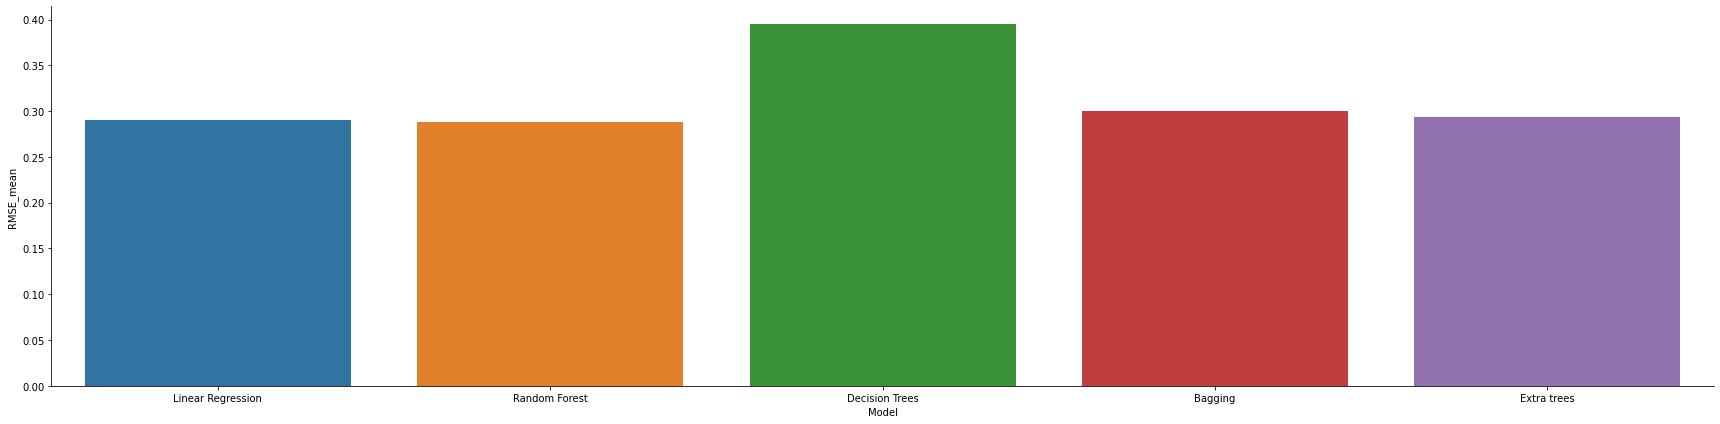

In [338]:
import seaborn as sns

sns.factorplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar',size=6, aspect=4)

In [339]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

ETC = ExtraTreesRegressor()
gb_param_grid = {'n_estimators' : [100,200,300,400,500],
              'max_depth': [4, 8,12,16],
              'min_samples_leaf' : [100,150,200,250],
              'max_features' : [0.3, 0.1] 
              }

gsETC = GridSearchCV(ETC,param_grid = gb_param_grid, cv=10, n_jobs= -1, verbose = 0)

gsETC.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150, 200, 250],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [340]:
ETC_best = gsETC.best_estimator_

In [341]:
# Best score
gsETC.best_score_,gsETC.best_params_

(0.08869465898874254,
 {'max_depth': 8,
  'max_features': 0.3,
  'min_samples_leaf': 100,
  'n_estimators': 100})

In [365]:
# Model creation
ETC = ExtraTreesRegressor(max_depth= 8,max_features = 0.3,min_samples_leaf =  100,n_estimators= 500)
ETC.fit(X_train, y_train)


#predicting the test set
y_pred = ETC.predict(X_test)
y_pred

array([0.11683202, 0.06175937, 0.19559756, ..., 0.09095263, 0.1018039 ,
       0.13137453])

In [343]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.19029222669037044
MSE: 0.0958862432636901
RMSE: 0.309655039138216


In [344]:
test_new=test.drop(["Item_Identifier","Item_Fat_Content"],axis=1)


In [362]:
#ETC.fit(X,y)
#test_yhat=ETC.predict(y_pred)

In [347]:
submission=pd.read_csv('C:/Users/HP/Desktop/Assignment/test/sample_submission.csv')
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [367]:
submission.Item_outlet_Sales=y_pred
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [354]:
submission.to_csv("C:/Users/HP/Desktop/Assignment/test/Solution.csv",index="False")